# Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import torch
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Import data

In [39]:
# For training the model
X_train = pd.read_csv("../../X/LOStrain.csv", index_col=[0])

# For cross validation
X_valid = pd.read_csv("../../X/LOSvalid.csv", index_col=[0])

# For prediction
X_test = pd.read_csv("../../X/LOStest.csv", index_col=[0])

y_train_t2 = pd.read_csv("../../Task2/Y_train.csv")
y_valid_t2 = pd.read_csv("../../Task2/Y_valid.csv")
y_train_t2_value=y_train_t2["los_icu"]
y_valid_t2_value=y_valid_t2["los_icu"]

final_index = X_test.index

In [40]:
# Impute the 0 with mean
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_nozero = pd.DataFrame(imp.fit_transform(X_train))
X_valid_nozero = pd.DataFrame(imp.fit_transform(X_valid))
X_test_nozero = pd.DataFrame(imp.fit_transform(X_test))
X_train_nozero

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.068072,1.170093,-0.638602,-0.002273,0.305052,-1.069743,-0.296768,0.040605,-1.109747,1.036957e-10,1.026004,1.478921,-2.039985
1,-0.221815,-0.061390,1.537514,-0.518339,0.049434,-1.044218,0.093803,0.040605,0.702851,1.036957e-10,-0.010417,0.198395,0.793194
2,1.194640,0.546114,1.723172,0.101098,0.049434,-0.858553,0.511385,0.040605,0.145354,1.036957e-10,-0.010417,0.161234,-1.561656
3,-0.563883,-0.029561,-0.661305,-0.188482,0.049434,-0.079990,0.093803,0.040605,-0.151030,1.036957e-10,-0.010417,-0.211957,0.728804
4,0.325216,-0.101854,0.603034,-0.157922,0.049434,-0.726826,-1.734962,0.040605,-0.181217,1.036957e-10,-0.010417,-0.341346,-1.074128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,0.068561,-1.432434,0.667703,-1.013160,0.049434,-0.598336,0.093803,0.040605,-0.036621,6.866879e-01,0.584864,-0.894033,0.039265
16756,-0.024141,0.370595,-0.389591,-0.067515,0.049434,-0.004140,-2.040678,0.040605,0.325411,1.036957e-10,0.973702,-0.841322,0.039265
16757,-0.125969,-0.518391,-1.128922,-0.353408,0.049434,-0.389777,1.863979,0.040605,0.006264,8.628834e-01,-0.443803,-0.629821,0.039265
16758,1.355096,1.023920,2.021813,0.149653,0.049434,1.028054,0.192377,-0.813486,0.052558,1.036957e-10,0.782719,-0.077771,0.039265


In [41]:
scaler = preprocessing.StandardScaler()

X_train=X_train_nozero.values
X_train= scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train)

X_valid=X_valid_nozero.values
X_valid= scaler.fit_transform(X_valid)
X_valid=pd.DataFrame(X_valid)

X_test=X_test_nozero.values
X_test= scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test)

In [42]:

X_train_norm = X_train
X_valid_norm = X_valid
X_test_norm = X_test

print(X_train_norm.shape)
print(X_valid_norm.shape)
print(X_test_norm.shape)


(16760, 13)
(2394, 13)
(4790, 13)


# Evaluation Matrix

In [43]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Hyperparameter and setting tuning

## Layer Choices

100%|█████████████████████████████████████████| 171/171 [13:02<00:00,  4.58s/it]


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 1), (7, 2), (7, 3), (7,

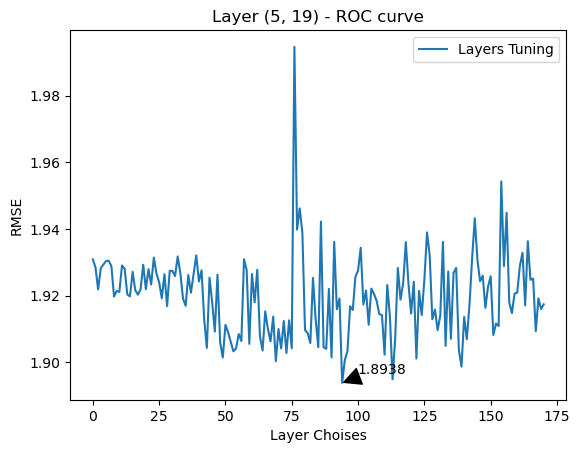

In [44]:
layer_list = []
rmse_lst=[]

for x in range (1,10,1):
    for y in range (1,20,1):
        layer_list.append((x,y))

for j in tqdm(range(len(layer_list))):
    i = layer_list[j]
    clf = MLPRegressor(solver="adam",
                       alpha=1e-5,
                       hidden_layer_sizes=i,
                       activation='relu',
                       random_state=3612,
                       max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(layer_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(list(range(len(layer_list))), rmse_lst, label='Layers Tuning')
plt.xlabel('Layer Choises')
plt.ylabel('RMSE')
plt.title(f"Layer {layer_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [45]:
best_layernumber = layer_list[index]
best_layernumber

(5, 19)

## Solver Choices

/home/fish/anaconda3/envs/comp3340/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


['lbfgs', 'sgd', 'adam']


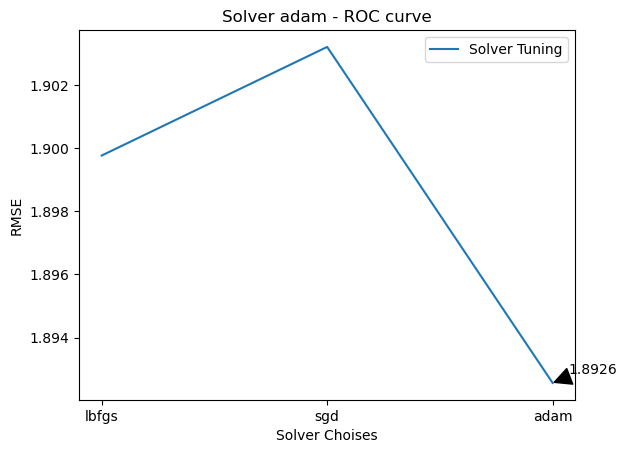

In [46]:
solver_list = ["lbfgs","sgd","adam"]
rmse_lst=[]

for i in solver_list:
    clf = MLPRegressor(solver=i,
                        alpha=1e-5,
                        hidden_layer_sizes=best_layernumber,
                        random_state=1,
                        activation='relu',
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(solver_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(solver_list, rmse_lst, label='Solver Tuning')
plt.xlabel('Solver Choises')
plt.ylabel('RMSE')
plt.title(f"Solver {solver_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [47]:
index = np.argmin(rmse_lst)
best_solver = solver_list[index]
best_solver

'adam'

## Learning rate tuning

[1e-10, 0.0001, 0.001, 0.0032500000000000003, 0.0055000000000000005, 0.007750000000000001, 0.01, 0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1, 0.1, 0.325, 0.55, 0.775, 1.0]


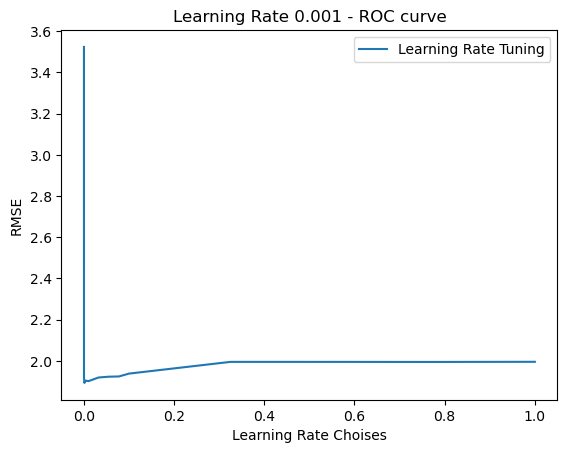

1.8926


In [48]:
lr_list = [1e-10,0.0001]+list(np.linspace(0.001,0.01,5))+list(np.linspace(0.01,0.1,5))+list(np.linspace(0.1,1,5))
rmse_lst=[]

for i in lr_list:
    clf = MLPRegressor(solver=best_solver,
                        hidden_layer_sizes=best_layernumber,
                        learning_rate_init=i,
                        learning_rate="adaptive", 
                        alpha=1e-5,
                        random_state=1,
                        activation='relu',
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(lr_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(lr_list, rmse_lst, label='Learning Rate Tuning')
plt.xlabel('Learning Rate Choises')
plt.ylabel('RMSE')
plt.title(f"Learning Rate {lr_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()
print(np.min(rmse_lst).round(4))

In [49]:
index = np.argmin(rmse_lst)
best_lr_choice =  lr_list[index]
best_lr_choice

0.001

## Regularization strength tuning

[1e-05, 1.2105263157894737e-05, 1.4210526315789475e-05, 1.6315789473684213e-05, 1.842105263157895e-05, 2.0526315789473685e-05, 2.2631578947368423e-05, 2.473684210526316e-05, 2.6842105263157896e-05, 2.8947368421052637e-05, 3.105263157894737e-05, 3.3157894736842106e-05, 3.526315789473685e-05, 3.736842105263158e-05, 3.9473684210526316e-05, 4.157894736842106e-05, 4.368421052631579e-05, 4.5789473684210527e-05, 4.789473684210527e-05, 5e-05]


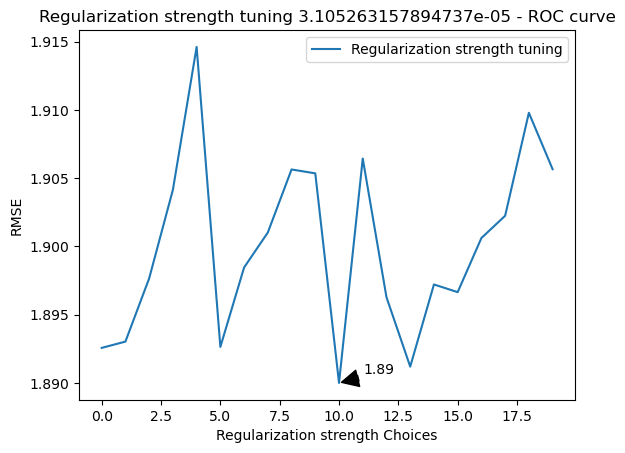

In [50]:
reg_list = list(np.linspace(1e-5,0.00005,20))
rmse_lst=[]

for i in reg_list:
    clf = MLPRegressor(solver=best_solver,
                        hidden_layer_sizes=best_layernumber,
                        learning_rate_init=best_lr_choice,
                        alpha=i,
                        random_state=1,
                        activation='relu',
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(reg_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(list(range(len(reg_list))), rmse_lst, label='Regularization strength tuning')
plt.xlabel('Regularization strength Choices')
plt.ylabel('RMSE')
plt.title(f"Regularization strength tuning {reg_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [51]:
index = np.argmin(rmse_lst)
best_reg_choice =  reg_list[index]
best_reg_choice

3.105263157894737e-05

In [52]:
index = np.argmin(rmse_lst)
best_rs_choice =  rs_list[index]
best_rs_choice

1001

## Activation function Choices

['identity', 'logistic', 'tanh', 'relu']


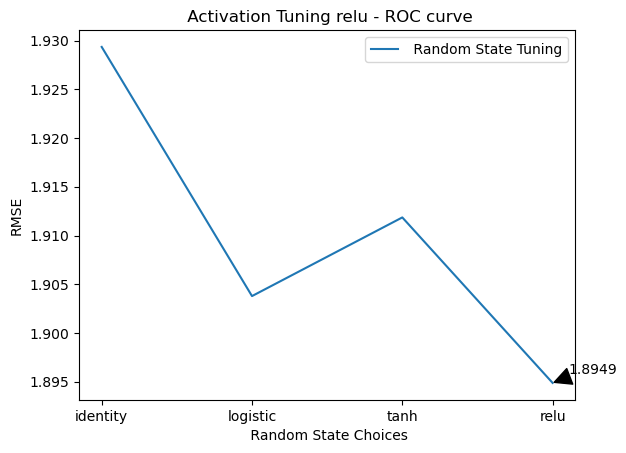

In [53]:
activation_list = ['identity','logistic','tanh','relu']
rmse_lst=[]

for i in activation_list:
    clf = MLPRegressor(solver=best_solver,
                        hidden_layer_sizes=best_layernumber,
                        learning_rate_init=best_lr_choice,
                        alpha=best_reg_choice,
                        random_state=3612,
                        activation=i,
                        max_iter=1000)

    clf.fit(X_train_norm, y_train_t2_value)
    y_pred = clf.predict(X_valid_norm)
    rmse1 = rmse(y_pred, y_valid_t2_value)
    rmse_lst.append(rmse1)
    
print(activation_list)
index = rmse_lst.index(min(rmse_lst))
plt.plot(activation_list, rmse_lst, label=' Random State Tuning')
plt.xlabel(' Random State Choices')
plt.ylabel('RMSE')
plt.title(f" Activation Tuning {activation_list[index]} - ROC curve")
plt.legend(loc="best")
plt.annotate(np.min(rmse_lst).round(4), (np.argmin(rmse_lst), np.min(rmse_lst)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

# Test

In [54]:
X = np.concatenate((X_train_norm,X_valid_norm),axis=0)
y = np.concatenate((y_train_t2_value,y_valid_t2_value),axis=0)

In [55]:
# Final model
reg1 = MLPRegressor(
                   )

reg1.fit(X_train_norm,y_train_t2_value)
y_pred = reg1.predict(X_valid_norm)
rmse(y_pred, y_valid_t2_value)

/home/fish/anaconda3/envs/comp3340/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1.941978747981517

In [56]:
y_pred = reg1.predict(X_valid_norm)
rmse(y_pred, y_valid_t2_value)

1.941978747981517

In [57]:
X_test_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03,4.790000e+03
mean,-2.373420e-17,1.186710e-17,2.373420e-17,3.356165e-17,-5.933551e-18,-1.780065e-17,1.483388e-18,5.933551e-18,1.780065e-17,-1.826421e-17,-1.186710e-17,-1.372134e-17,1.780065e-17
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00
min,-4.461371e+00,-2.838087e+00,-5.751612e+00,-8.597163e+00,-3.322443e+00,-8.085019e+00,-7.404562e+00,-4.846050e+00,-1.536470e+01,-2.006440e+01,-4.273184e+00,-2.313259e+00,-3.572175e+00
25%,-6.824738e-01,-7.032289e-01,-7.394177e-01,4.004780e-17,-6.909686e-01,-6.241685e-01,-3.045085e-01,0.000000e+00,-5.263943e-01,-8.355273e-18,-4.788060e-01,-6.111659e-01,-5.456345e-03
50%,-9.115115e-02,-5.913376e-02,-1.262557e-01,4.004780e-17,-1.176261e-01,-2.566844e-04,-3.860917e-17,0.000000e+00,1.144849e-01,-8.355273e-18,-5.272928e-18,-2.232884e-01,-5.338329e-18
75%,5.804267e-01,6.657724e-01,6.327505e-01,4.004780e-17,5.192116e-01,6.282353e-01,4.054969e-01,0.000000e+00,6.984003e-01,-8.355273e-18,1.888961e-01,3.547887e-01,8.664083e-01
max,5.962550e+00,3.850393e+00,4.374362e+00,3.912836e+01,5.446643e+00,4.471973e+00,1.815563e+01,5.688984e+00,1.387748e+00,1.330562e+01,8.326082e+00,9.680828e+00,1.183450e+00


In [58]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.553297,1.078399,-0.524059,4.004780e-17,0.421136,1.064077,-1.014514e+00,0.000000,-1.848229,-8.355273e-18,-5.272928e-18,-0.415307,-4.017585e-01
1,-1.099922,-1.207540,-0.374367,4.004780e-17,-0.240195,0.166202,2.091090e-02,0.000000,-1.384458,-8.355273e-18,-1.246132e-01,-0.558816,1.183450e+00
2,0.651308,-1.041872,0.175292,4.004780e-17,-0.520031,-1.267372,-3.860917e-17,0.000000,-0.064732,-8.355273e-18,-6.249432e-01,-0.316266,1.183450e+00
3,-1.452239,-0.192965,-0.030969,4.004780e-17,0.590545,1.559512,8.993892e-02,0.000000,0.438452,-8.355273e-18,2.714814e-01,-0.504495,-2.696578e-01
4,-1.199830,0.609956,-1.661466,4.004780e-17,0.618523,1.981568,-3.860917e-17,0.000000,0.486012,-8.355273e-18,-5.272928e-18,-1.076255,1.183450e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0.466176,0.039141,-0.414883,4.004780e-17,0.214572,-1.052785,1.569950e-01,0.088080,-0.185948,-7.044783e-01,-1.071546e+00,-0.651793,-5.338329e-18
4786,1.107539,-0.703327,1.982437,4.004780e-17,-0.009641,-0.073665,-1.547018e+00,0.000000,1.387748,1.179735e+00,-4.465473e-01,4.821510,-5.338329e-18
4787,-0.903081,0.702082,-0.193140,4.004780e-17,-0.021665,0.563954,3.628965e-01,-0.597745,0.276086,-1.866935e-01,1.366649e-01,-0.202232,-5.338329e-18
4788,-0.604500,-0.722571,0.716874,4.004780e-17,1.066831,-1.321485,1.470505e+00,0.000000,-1.297609,2.376283e-01,-6.178881e-01,0.049176,-5.338329e-18


In [59]:

result = reg1.predict(X_test_norm)
res1 = pd.DataFrame(result.tolist(), columns=["Predicted"])
res1.index = final_index
res1.index.name = 'Id'
pd.DataFrame(res1).to_csv('out12col.csv')
#print(torch.count_nonzero(torch.from_numpy(np.array(res1)).to(torch.float32)))
res1

,Predicted
Id,
32_175413_295037,3.473378
33_176176_296681,2.902602
42_119203_210828,2.692932
44_181750_291554,3.158209
61_176332_252348,3.008874
...,...
99883_150755_276467,2.851836
99897_162913_266801,3.875520
99913_175989_292375,2.922266
